In [1]:
from torch.optim import Adam

import render
import regularization
import transformation
from show import show_result_html

IMAGE_SIZE    = 64
DEVICE        = 'cpu'
LEARNING_RATE = 0.01

Converting inexact array by scaling by 255.00.



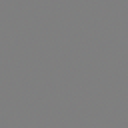

In [5]:
# code used to discover that I handled domain incorrectly... (I used domain=None by default and in their work it was domain=(0, 1))
import torch
import numpy as np

img = torch.sigmoid(torch.tensor(np.random.normal(size=(3, 64, 64), scale=0.01).astype(np.float32)))
show_result_html([img], [1])

Loaded InceptionV1 model


100%|██████████| 2560/2560 [00:46<00:00, 55.52it/s, loss=-11.9598]


Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.



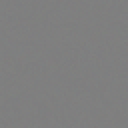
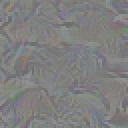
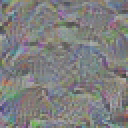
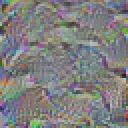
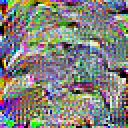
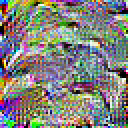

In [2]:
image = render.ParameterizedImage(IMAGE_SIZE, fft=False, decorrelate=False, device=DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer,
                                       image,
                                       device=DEVICE)

show_result_html(images, thresholds)

Loaded InceptionV1 model


100%|██████████| 2560/2560 [00:50<00:00, 50.62it/s, loss=-11.3047]


Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.



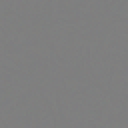
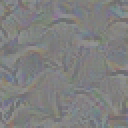
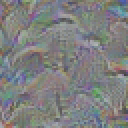
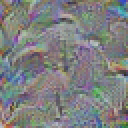
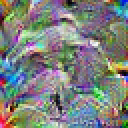
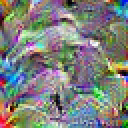

In [3]:
L1_weight   = 0.05
TV_weight   = 0.25
Blur_weight = 0.01

image = render.ParameterizedImage(IMAGE_SIZE, fft=False, decorrelate=False, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

regularizers = [
    regularization.add_regularizer(L1_weight, regularization.l1_reg),
    regularization.add_regularizer(TV_weight, regularization.total_variation),
    regularization.add_regularizer(Blur_weight, regularization.blur_reg),
]

images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer,
                                       image,
                                       regularizers,
                                       device=DEVICE)
show_result_html(images, thresholds)

Loaded InceptionV1 model


100%|██████████| 2560/2560 [00:41<00:00, 62.34it/s, loss=-6.4048]


Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.
Converting inexact array by scaling by 255.00.



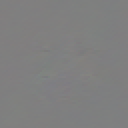
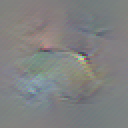
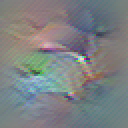
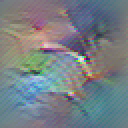
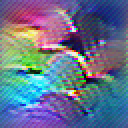
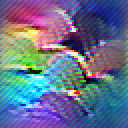

In [6]:
JITTER = 8
ROTATE = 5
SCALE  = 1.1

image = render.ParameterizedImage(IMAGE_SIZE, fft=True, decorrelate=True, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

transformations = transformation.TransformationRobustness(
    [
        transformation.pad_image(),
        transformation.jitter(JITTER*2),
        transformation.random_scale([SCALE ** (n/10.) for n in range(-10, 11)]),
        transformation.random_rotate(range(-ROTATE, ROTATE+1)),
        transformation.jitter(JITTER),
        transformation.crop_padding()
    ]
).to(DEVICE)

# obtain ready-to-display feature visualizations
images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer, 
                                       image,
                                       transformations=transformations,
                                       device=DEVICE)
show_result_html(images, thresholds)